In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h2>Loading The Dataset</h2>

Load the .csv file into a dataframe and get an overall look at the dataset

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [6]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [54]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [70]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Its clear that it is an <b>Imbalanced classification</b> problem

<h2>Data Visualization</h2>

Using barplots and boxplots to analyze the correlation between different the features and the target 

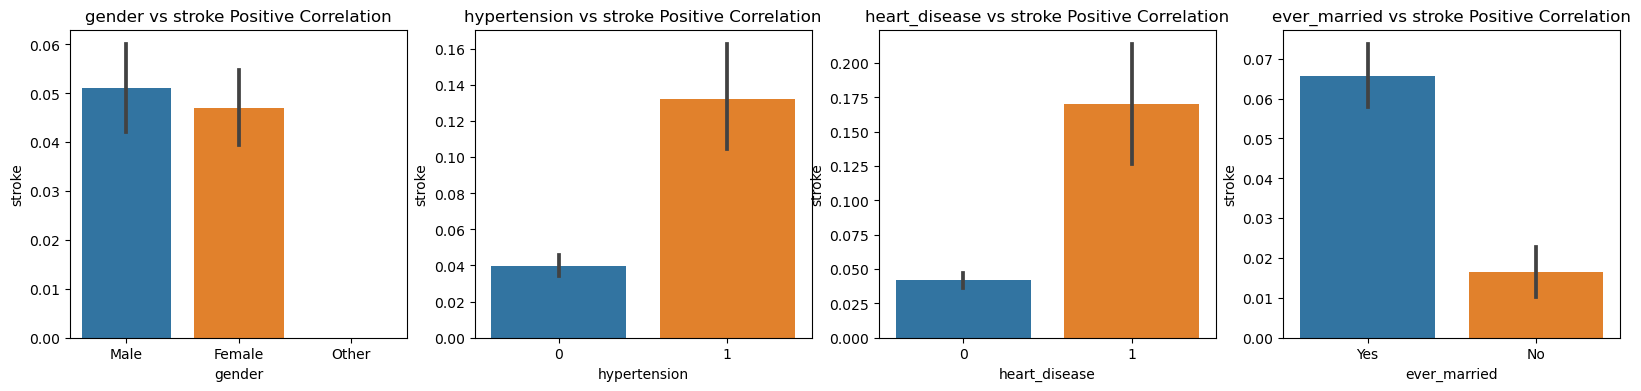

In [46]:
pos = ['gender', 'hypertension', 'heart_disease', 'ever_married']

f, axes = plt.subplots(ncols=4, figsize=(20, 4))
for i,j in enumerate(pos):
    sns.barplot(x=j, y='stroke', data=data, ax=axes[i])
    axes[i].set_title(j+' vs stroke Positive Correlation')

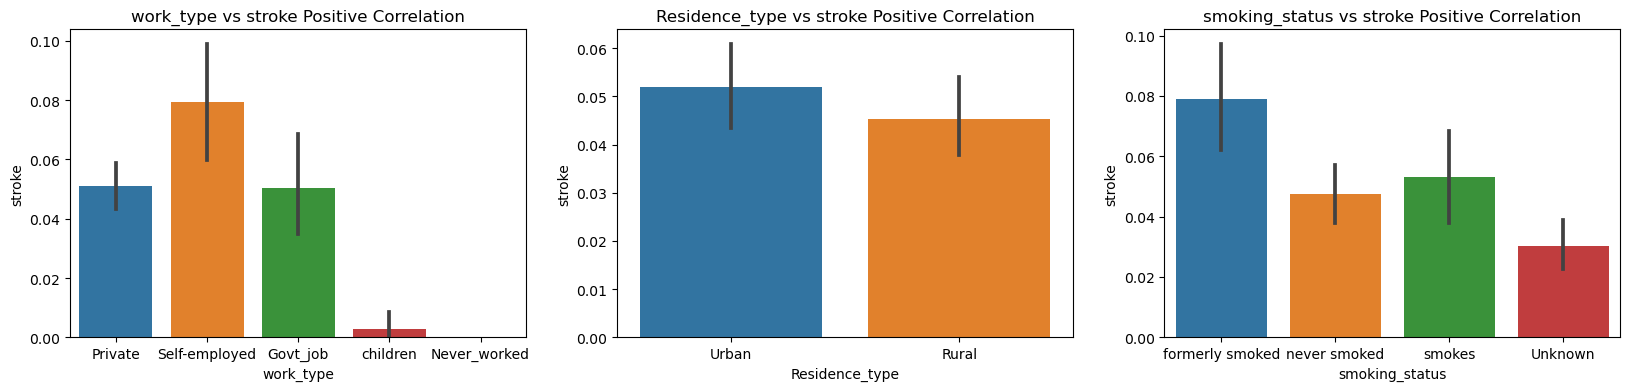

In [42]:
pos = ['work_type', 'Residence_type', 'smoking_status']

f, axes = plt.subplots(ncols=3, figsize=(20, 4))
for i,j in enumerate(pos):
    sns.barplot(x=j, y='stroke', data=data, ax=axes[i])
    axes[i].set_title(j+' vs stroke Positive Correlation')

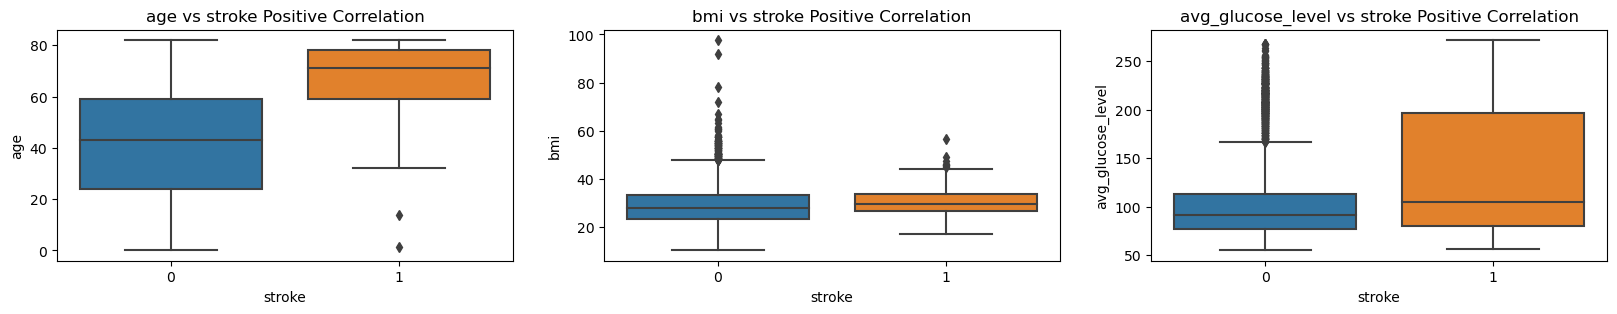

In [53]:
pos = ['age', 'bmi', 'avg_glucose_level']

f, axes = plt.subplots(ncols=3, figsize=(20, 3))
for i,j in enumerate(pos):
    sns.boxplot(x='stroke', y=j, data=data, ax=axes[i])
    axes[i].set_title(j+' vs stroke Positive Correlation')


<AxesSubplot:>

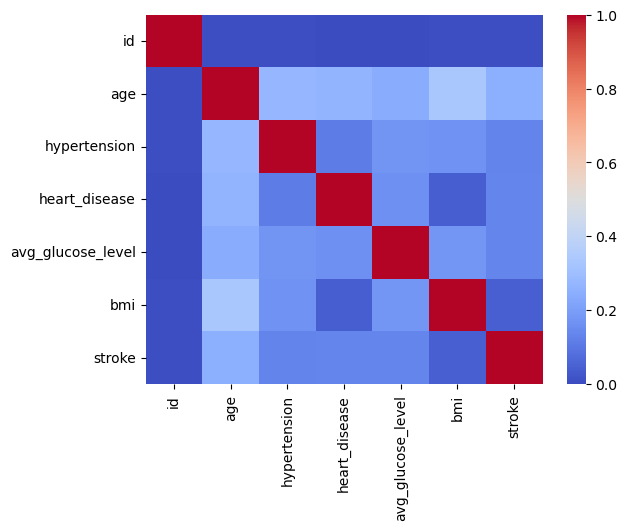

In [31]:
sns.heatmap(data.corr(), cmap='coolwarm')

<h2>Data Preprocessing</h2>

Dropping from the feature columns the columns with low correlation on the target column 

In [65]:
X = data.drop(columns=['id', 'gender','Residence_type', 'bmi', 'stroke'], axis=1)
y = data['stroke']

<h2>Model Evaluation</h2>


In [82]:
from sklearn.compose import make_column_selector as selector

numeric_selector = selector(dtype_exclude=object)
categorical_selector = selector(dtype_include=object)

numerical_column = numeric_selector(X)
categorical_column = categorical_selector(X)

In [77]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

Log_reg = LogisticRegression()
preprocessing = ColumnTransformer([('numeric', StandardScaler(), numerical_column),('categorical', OneHotEncoder(),categorical_column)])
model = make_pipeline(preprocessing, Log_reg)

In [79]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, X, y, cv=10, return_train_score=True, n_jobs=2, scoring=['accuracy','balanced_accuracy'])
cv_results = pd.DataFrame(cv_results)
cv_results.head()

,fit_time,score_time,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy
0,0.025720,0.002872,0.951076,0.951294,0.5,0.500000
1,0.064835,0.003448,0.951076,0.951511,0.5,0.502232
2,0.033326,0.004664,0.951076,0.951511,0.5,0.502232
3,0.039926,0.004171,0.951076,0.951511,0.5,0.502232
4,0.028482,0.003828,0.951076,0.951511,0.5,0.502232


Comparing the accuracy with the balanced accuracy, it's obvious that the dataset is imbalanced. To get better results, the dataset should include more samples of people who had strokes.